# Does the linear regression make sense?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import functions as f
import random

In [52]:
import scipy.stats as st

def get_pvalue(count, permut):
    # calculating p-value
    z_score = (np.array(pca_count160['matches'])-np.array(pca_permut160['mean']))/np.array(pca_permut160['std'])


    #cumulative distribution function
    # --> not sure if I should take 1- ? for righttailed test? i imagine? 
    p_values = 1-st.norm.cdf(z_score)


    # significance 5%
    top = st.norm.ppf(.975)
    bottom = st.norm.ppf(.025)
    
    return (p_values, z_score)

# PCA permutations

In [28]:
# import permutation scores
percentages = list(np.arange(0, 1.02, 0.02))
# acutally counts. of the evaluated permutations
pca_permut160 = pd.read_pickle('pca/permutations.pkl')


pca_count160 = pd.DataFrame(pd.read_pickle('pca/count.pkl'), columns = ['matches'])
pca_permut160['percentages'], pca_count160['percentages']=percentages, percentages

In [53]:
p_values, z_scores = get_pvalue(count = pca_count160, permut = pca_permut160)

<ipython-input-52-294d9cb244ce>:5: RuntimeWarning: invalid value encountered in true_divide
  z_score = (np.array(pca_count160['matches'])-np.array(pca_permut160['mean']))/np.array(pca_permut160['std'])


/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


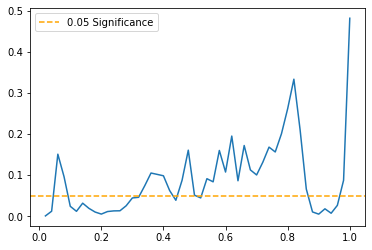

In [54]:
ax = sns.lineplot(percentages, p_values)
ax.axhline(0.05, ls = '--', c='orange', label = '0.05 Significance')
ax.legend()

Is this normal that it only goes to 0.5? 

In [62]:
pca_count160

,matches,percentages
0,0,0.00
1,6,0.02
2,8,0.04
3,8,0.06
4,11,0.08
5,15,0.10
6,18,0.12
7,19,0.14
8,22,0.16
9,25,0.18


In [59]:
pls_count160 = pd.DataFrame(pd.read_pickle('pls/count.pkl'), columns = ['matches'])
pls_count160['percentages']=percentages

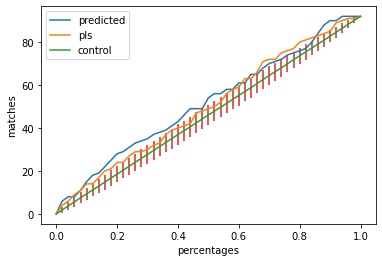

In [61]:
ax = sns.lineplot(data = pca_count160, x='percentages', y = 'matches',label='predicted')
ax = sns.lineplot(data = pls_count160, x='percentages', y = 'matches',label='pls')
ax = sns.lineplot(data = pca_permut160, x ='percentages', y = 'mean', label='control')
ax.errorbar(pca_permut160['percentages'], pca_permut160['mean'], yerr=pca_permut160['std'], fmt=' ', zorder=-1)
ax.legend()


#### There are 416 matches from the RegNet database for the 160 relevant genes, looking at predictors and targets. Of those, 91 are also represented in our set of 1109*152=167,459 pairs. 

# Linear - Permutations

In [28]:
# import permutation scores
percentages = list(np.arange(0, 1.02, 0.02))
# acutally counts. of the evaluated permutations
linear_permut160 = pd.read_pickle('linear/permutations.pkl')


linear_count160 = pd.DataFrame(pd.read_pickle('linear/count.pkl'), columns = ['matches'])
linear_permut160['percentages'], linear_count160['percentages']=percentages, percentages

In [53]:
p_values, z_scores = get_pvalue(count = linear_count160, permut = linear_permut160)

<ipython-input-52-294d9cb244ce>:5: RuntimeWarning: invalid value encountered in true_divide
  z_score = (np.array(pca_count160['matches'])-np.array(pca_permut160['mean']))/np.array(pca_permut160['std'])


/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


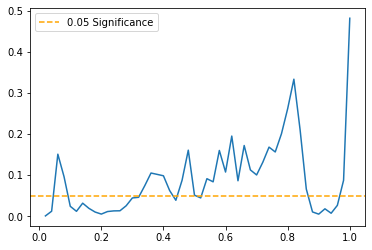

In [54]:
ax = sns.lineplot(percentages, p_values)
ax.axhline(0.05, ls = '--', c='orange', label = '0.05 Significance')
ax.legend()

Is this normal that it only goes to 0.5? 

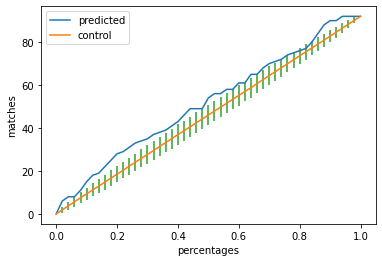

In [55]:
ax = sns.lineplot(data = linear_count160, x='percentages', y = 'matches',label='predicted')
ax = sns.lineplot(data = linear_permut160, x ='percentages', y = 'mean', label='control')
ax.errorbar(linear_permut160['percentages'], linear_permut160['mean'], yerr=linear_permut160['std'], fmt=' ', zorder=-1)
ax.legend()


In [28]:
# import permutation scores
percentages = list(np.arange(0, 1.02, 0.02))
# acutally counts. of the evaluated permutations
pca_permut160 = pd.read_pickle('pca/permutations.pkl')


pca_count160 = pd.DataFrame(pd.read_pickle('pca/count.pkl'), columns = ['matches'])
pca_permut160['percentages'], pca_count160['percentages']=percentages, percentages

In [53]:
p_values, z_scores = get_pvalue(count = pca_count160, permut = pca_permut160)

<ipython-input-52-294d9cb244ce>:5: RuntimeWarning: invalid value encountered in true_divide
  z_score = (np.array(pca_count160['matches'])-np.array(pca_permut160['mean']))/np.array(pca_permut160['std'])


/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


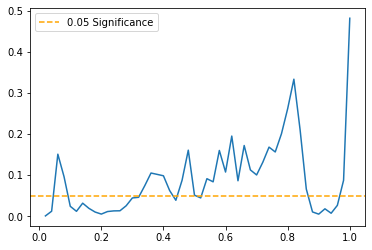

In [54]:
ax = sns.lineplot(percentages, p_values)
ax.axhline(0.05, ls = '--', c='orange', label = '0.05 Significance')
ax.legend()

Is this normal that it only goes to 0.5? 

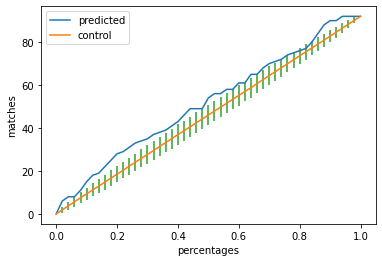

In [55]:
ax = sns.lineplot(data = pca_count160, x='percentages', y = 'matches',label='predicted')
ax = sns.lineplot(data = pca_permut160, x ='percentages', y = 'mean', label='control')
ax.errorbar(pca_permut160['percentages'], pca_permut160['mean'], yerr=pca_permut160['std'], fmt=' ', zorder=-1)
ax.legend()
